<a href="https://colab.research.google.com/github/Rajeeb321123/Pytorch/blob/master/03_0_Introduction_to_comuter_vision_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolution Neural Networks and Computer Vision

**Important**
[must_learn_CNN](https://poloclub.github.io/cnn-explainer/)

# Binary Classification Computer vision

In [ ]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
device

PyTorch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124


'cpu'

## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip  #wget means: get this file and download in colab

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-02-10 05:59:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.1MB/s    in 5.7s    

2025-02-10 05:59:48 (18.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data

In [ ]:
!ls pizza_steak   # ls means: list file in the pizza_steak folder

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in'{dirpath}'.")

There are 2 directoreis and 0 images in'pizza_steak'.
There are 2 directoreis and 0 images in'pizza_steak/test'.
There are 0 directoreis and 250 images in'pizza_steak/test/pizza'.
There are 0 directoreis and 250 images in'pizza_steak/test/steak'.
There are 2 directoreis and 0 images in'pizza_steak/train'.
There are 0 directoreis and 750 images in'pizza_steak/train/pizza'.
There are 0 directoreis and 750 images in'pizza_steak/train/steak'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 10 05:59 .
drwxr-xr-x 1 root root 4096 Feb 10 05:59 ..
drwxr-xr-x 4 root root 4096 Feb 10 05:59 test
drwxr-xr-x 4 root root 4096 Feb 10 05:59 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))  # listdir is method to list all the names in directories

num_steak_images_train

750

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# to select image randomly image
def view_random_image(target_dir, target_class): #target_dir in directory, target_class is either steak or pizza here
  # Setup the target directory (we'll view iamges from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder  + "/" + random_image[0]) # we random_image in list format so, we change into string path format to read
  plt.imshow(img)

  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}") # show the shape of the image

  return img # why we return img because when after read in below it turns into a big array and consider into tensor

['2534774.jpg']
Image shape:(512, 512, 3)


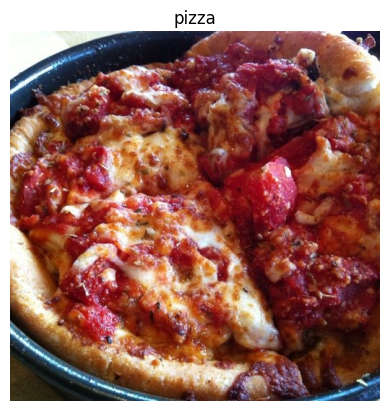

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

['2473559.jpg']
Image shape:(512, 512, 3)


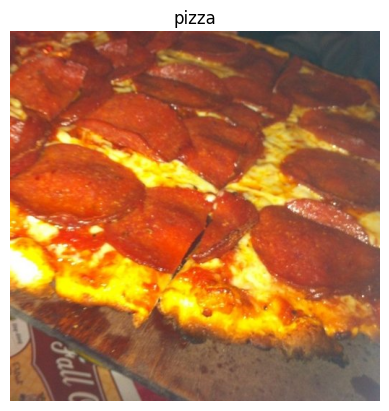

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

🔑 NOTE: looks like shape of each image is different. we want to resize them to same shape like 224x224

The shape of transformed_image:  torch.Size([3, 224, 224])
The shape of transformed image after managing proper order torch.Size([224, 224, 3])


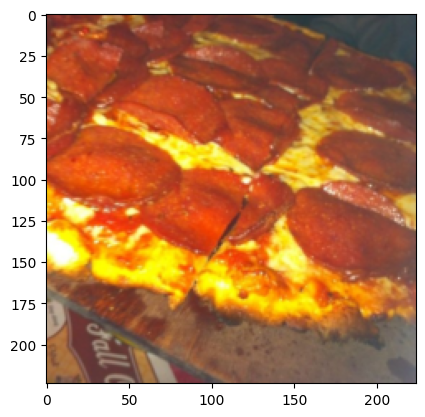

In [ ]:
from torchvision import transforms
from PIL import Image

x = Image.fromarray(img.astype('uint8'))
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
    transforms.ToTensor()  # Convert the image to a PyTorch tensor
])

temp = transform(x)
print("The shape of transformed_image: ",temp.shape)
temp = temp.permute(1, 2, 0) # change the order of dimesnion of matrix. 0 to 1, 1 to 2 and 2 to 0
print("The shape of transformed image after managing proper order",temp.shape)
plt.imshow(temp)


array([[[137,  54,  46],
        [138,  55,  47],
        [139,  56,  50],
        ...,
        [ 59,  69,  81],
        [ 60,  68,  81],
        [ 61,  69,  82]],

       [[133,  53,  46],
        [134,  54,  47],
        [135,  55,  48],
        ...,
        [ 61,  71,  83],
        [ 62,  70,  83],
        [ 62,  70,  83]],

       [[130,  53,  47],
        [130,  53,  47],
        [130,  53,  47],
        ...,
        [ 62,  72,  84],
        [ 61,  71,  83],
        [ 61,  71,  83]],

       ...,

       [[146,  97,  54],
        [147, 100,  56],
        [145, 100,  58],
        ...,
        [110, 109, 117],
        [110, 110, 118],
        [109, 109, 117]],

       [[148, 101,  57],
        [148, 101,  57],
        [145, 100,  58],
        ...,
        [111, 110, 118],
        [110, 110, 118],
        [108, 108, 116]],

       [[148, 101,  57],
        [146, 102,  57],
        [144,  99,  57],
        ...,
        [113, 112, 120],
        [112, 112, 120],
        [109, 109, 117]]], dtype=uint8)
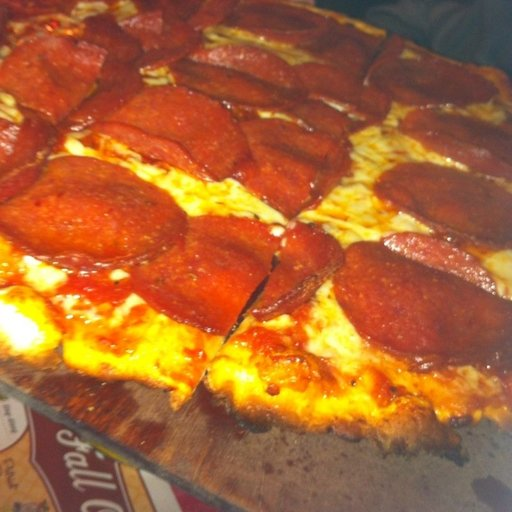

In [ ]:
img # its an ndarray so we can change it to torch tensor

In [ ]:
torch.tensor(img)

tensor([[[137,  54,  46],
         [138,  55,  47],
         [139,  56,  50],
         ...,
         [ 59,  69,  81],
         [ 60,  68,  81],
         [ 61,  69,  82]],

        [[133,  53,  46],
         [134,  54,  47],
         [135,  55,  48],
         ...,
         [ 61,  71,  83],
         [ 62,  70,  83],
         [ 62,  70,  83]],

        [[130,  53,  47],
         [130,  53,  47],
         [130,  53,  47],
         ...,
         [ 62,  72,  84],
         [ 61,  71,  83],
         [ 61,  71,  83]],

        ...,

        [[146,  97,  54],
         [147, 100,  56],
         [145, 100,  58],
         ...,
         [110, 109, 117],
         [110, 110, 118],
         [109, 109, 117]],

        [[148, 101,  57],
         [148, 101,  57],
         [145, 100,  58],
         ...,
         [111, 110, 118],
         [110, 110, 118],
         [108, 108, 116]],

        [[148, 101,  57],
         [146, 102,  57],
         [144,  99,  57],
         ...,
         [113, 112, 120],
        

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common perprocessing steps for working with images is to scale( also referred to as normalized) their pixel values by dividing the image by 255. (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.5372549 , 0.21176471, 0.18039216],
        [0.54117647, 0.21568627, 0.18431373],
        [0.54509804, 0.21960784, 0.19607843],
        ...,
        [0.23137255, 0.27058824, 0.31764706],
        [0.23529412, 0.26666667, 0.31764706],
        [0.23921569, 0.27058824, 0.32156863]],

       [[0.52156863, 0.20784314, 0.18039216],
        [0.5254902 , 0.21176471, 0.18431373],
        [0.52941176, 0.21568627, 0.18823529],
        ...,
        [0.23921569, 0.27843137, 0.3254902 ],
        [0.24313725, 0.2745098 , 0.3254902 ],
        [0.24313725, 0.2745098 , 0.3254902 ]],

       [[0.50980392, 0.20784314, 0.18431373],
        [0.50980392, 0.20784314, 0.18431373],
        [0.50980392, 0.20784314, 0.18431373],
        ...,
        [0.24313725, 0.28235294, 0.32941176],
        [0.23921569, 0.27843137, 0.3254902 ],
        [0.23921569, 0.27843137, 0.3254902 ]],

       ...,

       [[0.57254902, 0.38039216, 0.21176471],
        [0.57647059, 0.39215686, 0.21960784],
        [0.56862745, 0

In [ ]:
(img/255.).shape

(512, 512, 3)

In [ ]:
(img/255.)[0,0,:] # 3 color channel RGB

array([0.5372549 , 0.21176471, 0.18039216])

## Model_1

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data



In [ ]:
from torch.optim.lr_scheduler import LambdaLR
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Different normation techniques:

-standard_deviation_normalization (-1 to 1) = $$x' = \frac{x - \mu}{\sigma}$$

Min-Max normalization (0 to 1) = $$ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$$

### Data Augmentaion and Creating Batches

In [ ]:
# Import necessary libraries
from torchvision import transforms

# Define the transform
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=(0.5,), std=(0.5,)) # if you want value between -1
])

# Apply the transform to an example image
# Example image: let's assume it's already a NumPy array with pixel values in the range [0, 1]
import numpy as np
image = np.array([[0.0, 0.5, 1.0], [0.25, 0.75, 0.6], [0.9, 0.2, 0.3]])

# Convert to PyTorch tensor and apply normalization
image_tensor = transforms.ToTensor()(image)
# normalized_image = transforms.Normalize((0.5,), (0.5,))(image_tensor)

print(image_tensor)
# print(normalized_image)

tensor([[[0.0000, 0.5000, 1.0000],
         [0.2500, 0.7500, 0.6000],
         [0.9000, 0.2000, 0.3000]]], dtype=torch.float64)


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


torch.manual_seed(42)
BATCH_SIZE = 32


# Define transformations for the validation sets
transform_without_augmentation = transforms.Compose([
    transforms.Resize((224, 224)), # resize every image to 224x224
    transforms.ToTensor(),

    # Normalizing with mean and std deviation of 0.5 meaning value between -1 to 1. But we don't want that
    # transforms.Normalize((0.5,), (0.5,))
])

# Define the transformation for the transform_
transform_with_augmentation =  transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomAffine(
        degrees=20,              # randomly rotate images by -20 to 20 degrees
        translate=(0.2, 0.3),    # randomly shift images: 20% horizontally, 30% vertically
        scale=(0.8, 1.2),        # randomly zoom images: scale ranges from 80% to 120%
        shear=20               # randomly shear images by -20 to 20 degrees
    ),
    transforms.RandomHorizontalFlip(),
    ## above and below are same
    # transforms.RandomRotation(degrees=20),  # Rotates randomly within ±20 degrees
    # transforms.RandomAffine(degrees=0, shear=20),  # Shear transformation
    # transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.2)),  # Zoom effect
    # transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    # transforms.RandomAffine(degrees=0, translate=(0.2, 0.3)),  # Width and height shift
    # transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Random perspective transformation
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])
# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Load the datasets with the transformations
train_data = datasets.ImageFolder(root=train_dir, transform=transform_with_augmentation)
valid_data = datasets.ImageFolder(root=test_dir, transform=transform_without_augmentation)

# for the demonstration only in plot. We always augmented
train_data_without_augmented = datasets.ImageFolder(root=train_dir, transform=transform_without_augmentation)

print(f"The total train_data is :{len(train_data)}")
print(f"The total test_data is :{len(valid_data)}")

# Create DataLoaders
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False)

# for demonsatration only in plot
train_dataloader_without_augmented = DataLoader(train_data_without_augmented, batch_size=BATCH_SIZE, shuffle=False)
train_dataLoader_unsuffled = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, valid_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(valid_dataloader)} batches of {BATCH_SIZE}")
print(f"The classes are: {train_data.classes}")
# In PyTorch, the convention is to use the (channels, height, width) format for images. This is different from some other libraries (like TensorFlow) which use (height, width, channels). The reason for this convention in PyTorch is rooted in how the underlying operations, like convolution, are optimized for performance.


The total train_data is :1500
The total test_data is :500
Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d815d3d1b10>, <torch.utils.data.dataloader.DataLoader object at 0x7d815c312290>)
Length of train dataloader: 47 batches of 32
Length of test dataloader: 16 batches of 32
The classes are: ['pizza', 'steak']


In [ ]:
for a in train_dataloader:
  print(a[0].shape)

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size

In [ ]:
train_data[100]

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.1294, 0.1255, 0.1176,  ..., 0.0000, 0.0000, 0.0000],
          [0.1176, 0.1216, 0.1333,  ..., 0.0000, 0.0000, 0.0000],
          [0.1294, 0.1373, 0.1608,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0824, 0.0745, 0.0745,  ..., 0.0000, 0.0000, 0.0000],
          [0.0745, 0.0784, 0.0824,  ..., 0.0000, 0.0000, 0.0000],
          [0.0824, 0.0863, 0.1020,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

In [ ]:
# Get a batch of data
# When you use next(iter(train_dataloader)), it retrieves the next batch of data from the DataLoader iterator, not specifically the last batch. It fetches batches one by one from the beginning of the DataLoader each time it is invoked until there are no more batches left.
images, labels = next(iter(train_dataLoader_unsuffled))

print(f"Image batch shape: {images.shape}")
print(f"Label batch shape: {labels.shape}")
images.shape, labels

Image batch shape: torch.Size([32, 3, 224, 224])
Label batch shape: torch.Size([32])


(torch.Size([32, 3, 224, 224]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
# Get sample data batches (last batch)
images, labels = next(iter(train_dataLoader_unsuffled))
unaugmented_images, unagmented_labels = next(iter(train_dataloader_without_augmented))

showing image number:24


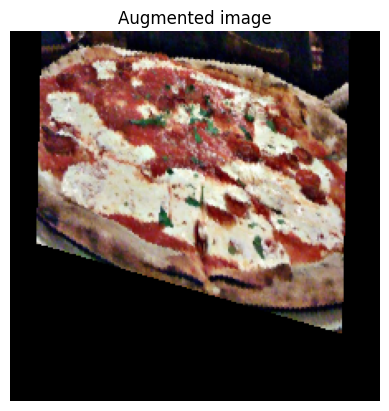

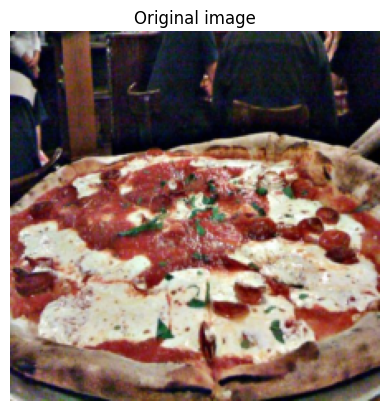

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch size are 32... so random from 0 to 32
print(f"showing image number:{random_number}")
plt.title(f"Augmented image")
plt.imshow(images[random_number].permute(1, 2, 0) ) # we need to do permute for making 224 x 224 x 3
plt.axis(False)
plt.figure()
plt.title(f"Original image")
plt.imshow(unaugmented_images[random_number].permute(1, 2, 0) )
plt.axis(False);

### Creating model

In [ ]:
# nn.Conv2d(in_channels=3,out_channels=1200, kernel_size=3, padding=0)(train_data[0][0].unsqueeze(dim=0)).shape


In [ ]:
conv_layer = nn.Sequential(
        # fiters is the number of sliding window going across the input image
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=0), # valid padding = no padding or 0, out_channel
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=1),  #downsample by taking the max from 2x2 regions
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=1),  #downsample by taking the max from 2x2 regions
)

with torch.no_grad():
            # setting batch = 1 . Single batch each loop
            dummy_input = torch.zeros(1, 3, *(224, 224))  # shape: (batch, channels, height, width)
            # dummy_input = torch.zeros(1, 3, 224, 224)  # same as above
            conv_out = conv_layer(dummy_input)
            print(conv_out.shape)
            flattened_size = nn.Flatten()(conv_out).shape[1]
            print(flattened_size)

            # print(conv_out.reshape(1, -1).shape) # just changing conv_out to 2d tensor of size(1, total no of values) and getting the number of values
            # flattened_size = conv_out.view(1, -1).size(1)


torch.Size([1, 32, 214, 214])
1465472


In [ ]:
torch.zeros(1, 3, *(224, 224)).shape

torch.Size([1, 3, 224, 224])

In [ ]:
torch.manual_seed(42)

class Model_1(nn.Module):

  def __init__(self, input_channels=3, input_size=(224, 224)):
      """
      Args:
          input_channels (int): Number of channels in the input image. here 3 for RGB
          input_size (tuple): The (height, width) of the input image.
      """
      super(Model_1, self).__init__()

      # Convolutional layers
      self.conv_layer = nn.Sequential(
          # fiters is the number of sliding window going across the input image
          nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=0), # valid padding = no padding or 0, out_channel
          nn.ReLU(),
          nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=1),  #downsample by taking the max from 2x2 regions
          nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0),
          nn.ReLU(),
          nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=1) #downsample by taking the max from 2x2 regions
      )
        # Automatically check the shape of the flatten
        # Brute way:
      # self.flattened_size = input_size[0] * input_size[1] * 32
        # Better way:
      with torch.no_grad():
            # setting batch = 1 . Single batch each loop
            dummy_input = torch.zeros(1, input_channels, *input_size)  # shape: (batch, channels, height, width)
            # dummy_input = torch.zeros(1, 3, 224, 224)  # same as above
            conv_out = self.conv_layer(dummy_input)
            self.flattened_size = nn.Flatten()(conv_out).shape[1]

      #full connected layer
      self.fc = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=self.flattened_size, out_features=1),
          nn.Sigmoid() #Do not use nn.Sigmoid() in your model's final layer if you're using nn.BCEWithLogitsLoss.
                        #Use nn.Sigmoid() if you're using nn.BCELoss.
      )
  def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc(x)
        return x

model_1 = Model_1()
model_1 = model_1.to(device)

In [ ]:
# Compile
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.001,              # equivalent to learning_rate=0.001
                            betas=(0.9, 0.999),    # equivalent to beta_1=0.9 and beta_2=0.999
                            eps=1e-07,             # equivalent to epsilon=1e-07
                            amsgrad=False,         # equivalent to amsgrad=False
                            weight_decay=0.0       # if you don't need weight decay, set to 0.0; otherwise, use your desired value
                            )

# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)
lr_lambda = lambda epoch: 1 if epoch< 40 else 0.95  **  epoch
# lr = 1e-3 * 10**(epoch/10)
# In PyTorch, since optimizer's lr is already initial_lr, we set:
# lr_factor(epoch) = 10**(epoch/10)
scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

In [ ]:
# Get sample data batches (last batch)
images, labels = next(iter(train_dataLoader_unsuffled))

In [ ]:
torch.unique(labels)

tensor([0])

In [ ]:
with torch.no_grad():
  images = images.to(device)
  y_logits = model_1(images)[:5]
  print("y_logits:", y_logits)
  # Use sigmoid on model logits
  # y_pred_probs = torch.sigmoid(y_logits) # donot need this as we use sigmoid in model_1 at the end of stack
  print("y_pred_probs:", y_logits.squeeze())
  print("y_pred_probs:", torch.round(y_logits.squeeze()))

y_logits: tensor([[0.4967],
        [0.4956],
        [0.4963],
        [0.4969],
        [0.4964]], device='cuda:0')
y_pred_probs: tensor([0.4967, 0.4956, 0.4963, 0.4969, 0.4964], device='cuda:0')
y_pred_probs: tensor([0., 0., 0., 0., 0.], device='cuda:0')


In [ ]:
labels.float()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

Epoch 1/10 | LR: 0.001000 | Train Loss: 105.0280, Train Acc: 57.5333 | Val Loss: 58.9324, Val Acc: 73.6000
Epoch 2/10 | LR: 0.001000 | Train Loss: 59.4664, Train Acc: 68.2667 | Val Loss: 41.1193, Val Acc: 84.8000
Epoch 3/10 | LR: 0.001000 | Train Loss: 55.5161, Train Acc: 72.8667 | Val Loss: 39.6084, Val Acc: 84.0000
Epoch 4/10 | LR: 0.001000 | Train Loss: 56.7381, Train Acc: 70.8000 | Val Loss: 51.4031, Val Acc: 74.8000
Epoch 5/10 | LR: 0.001000 | Train Loss: 53.7774, Train Acc: 74.7333 | Val Loss: 42.0108, Val Acc: 81.0000
Epoch 6/10 | LR: 0.001000 | Train Loss: 52.5266, Train Acc: 75.8667 | Val Loss: 37.4229, Val Acc: 84.8000
Epoch 7/10 | LR: 0.001000 | Train Loss: 51.2440, Train Acc: 76.5333 | Val Loss: 40.5485, Val Acc: 82.8000
Epoch 8/10 | LR: 0.001000 | Train Loss: 50.2274, Train Acc: 77.6000 | Val Loss: 42.7424, Val Acc: 81.0000
Epoch 9/10 | LR: 0.001000 | Train Loss: 50.6652, Train Acc: 77.6000 | Val Loss: 35.4585, Val Acc: 85.0000
Epoch 10/10 | LR: 0.001000 | Train Loss: 51.4

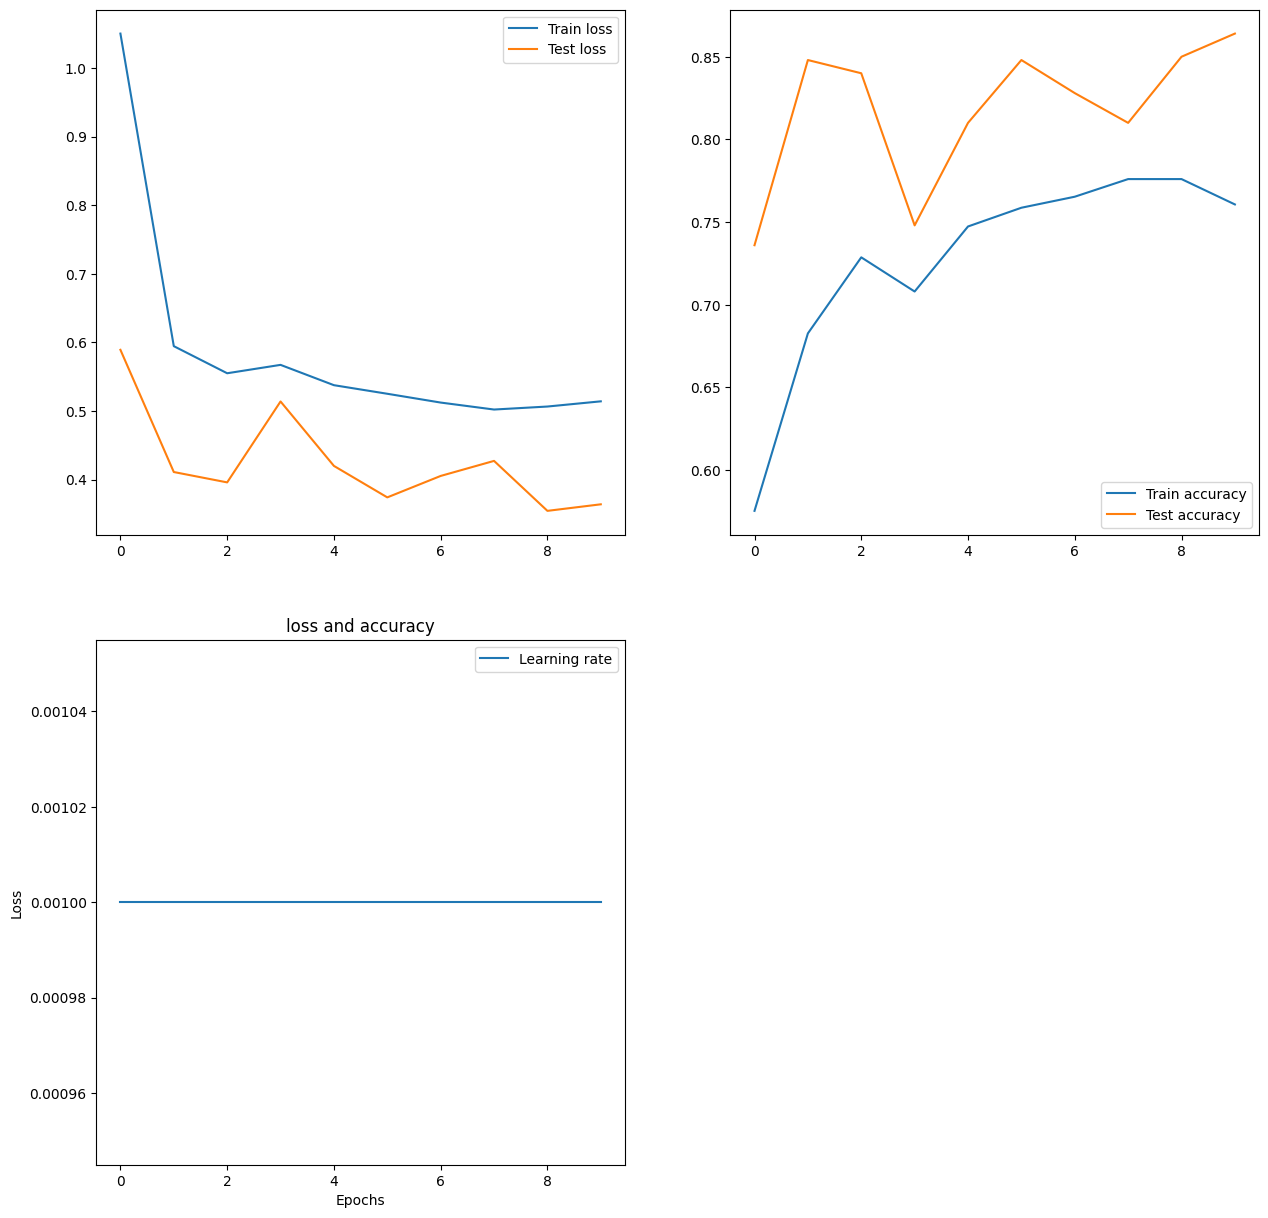

In [ ]:
# fit or train loop
torch.manual_seed(42)
epochs = 10

train_loss_values = []
train_acc_values = []
test_loss_values = []
test_acc_values = []
epoch_count = []
learning_rate = []

for epoch in range(epochs):
    model_1.train()

    running_loss = 0.0
    running_correct = 0
    total = 0


    for inputs, labels in train_dataloader:
      # Move inputs and labels to the device
      inputs, labels = inputs.to(device), labels.to(device)
      y_preds_probs = model_1(inputs).squeeze()
      labels = labels.float()
      loss = loss_fn(y_preds_probs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # Statistics
      running_loss += loss.item() * inputs.size(0)
      preds = torch.round(y_preds_probs)
      running_correct += (preds == labels).sum().item()
      total += labels.size(0)

    train_loss = running_loss / total
    train_acc = running_correct / total

    ### Testing
      # Validation phase
    model_1.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in valid_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_1(inputs).squeeze()
            labels = labels.float()
            loss = loss_fn(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            preds = torch.round(outputs)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss = val_running_loss/ val_total
    val_acc = val_correct / val_total

    # Print out what's happening
    current_lr = scheduler.get_last_lr()[0]

    epoch_count.append(epoch)
    train_loss_values.append(train_loss)
    test_loss_values.append(val_loss)
    train_acc_values.append(train_acc)
    test_acc_values.append(val_acc)
    learning_rate.append(current_lr)

    if epoch % 1 == 0 or epoch + 1 == epochs:
        print(f"Epoch {epoch+1}/{epochs} | "
        f"LR: {current_lr:.6f} | "
        f"Train Loss: {(100*train_loss):.4f}, Train Acc: {(100*train_acc):.4f} | "
        f"Val Loss: {(100*val_loss):.4f}, Val Acc: {(100*val_acc):.4f}")
    # Step the scheduler at the end of the epoch
    scheduler.step()



# Plot
plt.figure(figsize=(15, 15))
ax_1 = plt.subplot(2, 2, 1)
ax_2 = plt.subplot(2, 2, 2)
ax_3 = plt.subplot(2, 2, 3)
ax_1.plot(epoch_count,
         train_loss_values,
         label="Train loss")
ax_1.plot(epoch_count,
         test_loss_values,
         label="Test loss")
ax_2.plot(epoch_count,
         train_acc_values,
         label="Train accuracy")
ax_2.plot(epoch_count,
         test_acc_values,
         label="Test accuracy")
ax_3.plot(epoch_count,
         learning_rate,
         label="Learning rate")
ax_1.legend()
ax_2.legend()
ax_3.legend()
plt.title("loss and accuracy")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### Prediction

In [ ]:
# Get sample data batches (last batch)
images, labels = next(iter(valid_dataloader))
with torch.no_grad():
  images = images.to(device)
  y_logits = model_1(images)
  # Use sigmoid on model logits
  # y_pred_probs = torch.sigmoid(y_logits) # donot need this as we use sigmoid in model_1 at the end of stack
  print("y_pred_probs:", torch.round(y_logits.squeeze()))
  print("y_true_probs:", labels.float())

y_pred_probs: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')
y_true_probs: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
images.shape

torch.Size([32, 3, 224, 224])

In [ ]:
transform_without_augmentation = transforms.Compose([
    transforms.Resize((224, 224)), # resize every image to 224x224
    transforms.ToTensor(),
])

# Create a function to import an image and resize it to be able to used with our
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, converts it to a tensor, and resizes it to (img_shape, img_shape).
    """
    # Open the image file
    img = Image.open(filename)  # Convert to grayscale for MNIST-like input

    img = transform_without_augmentation(img)


    # Add batch dimension
    img = img.unsqueeze(0)

    return img

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located at filename, makes a prediciton with model
  and plot the images with the predicted class as teh title.
  """
  # Import the target iamge and preprocess it
  img = load_and_prep_image(filename)

  model.eval()
  with torch.no_grad():
    image = img.to(device)
    y_pred_probs = model_1(image)
    y_pred = torch.round(y_pred_probs).squeeze()
    print("y_pred:", y_pred)


  # Plot the image and predict class
  plt.imshow(img.squeeze().permute(1,2,0))
  plt.title(f"Prediction: {class_names[int(y_pred.cpu().numpy())]}")
  plt.axis(False);

y_pred: tensor(0., device='cuda:0')


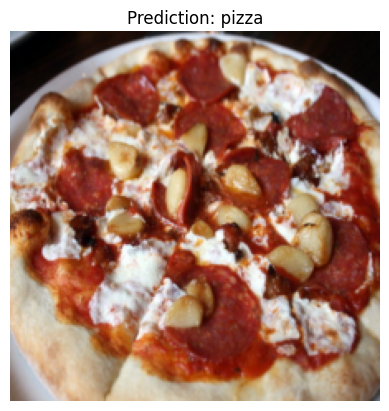

In [ ]:
pred_and_plot(model_1, "/content/pizza_steak/test/pizza/2296393.jpg", class_names=class_names)

# Multi class classification computer vision

In [ ]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image
from torch.optim.lr_scheduler import LambdaLR

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
device

PyTorch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124


'cuda'

## Get Data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref= zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2025-02-10 22:28:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.1MB/s    in 24s     

2025-02-10 22:28:42 (20.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 2 directories and 0 images in '10_food_classes_all_data'. 
There are 10 directories and 0 images in '10_food_classes_all_data/test'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# to select image randomly image
def view_random_image(target_dir, target_class): #target_dir in directory, target_class is either steak or pizza here
  # Setup the target directory (we'll view iamges from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder  + "/" + random_image[0]) # we random_image in list format so, we change into string path format to read
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}") # show the shape of the image

  return img

['2466030.jpg']
Image shape:(512, 512, 3)


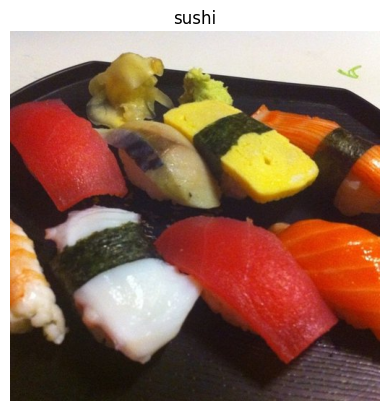

In [ ]:
# Visualize, Visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Model_2

### Data Augmentation and Batch Creation

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


torch.manual_seed(42)
BATCH_SIZE = 64


# Define transformations for the validation sets
transform_without_augmentation = transforms.Compose([
    transforms.Resize((224, 224)), # resize every image to 64
    transforms.ToTensor(),
])

# Define the transformation for the transform_
transform_with_augmentation =  transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomAffine(
        degrees=20,              # randomly rotate images by -20 to 20 degrees
        translate=(0.2, 0.3),    # randomly shift images: 20% horizontally, 30% vertically
        scale=(0.8, 1.2),        # randomly zoom images: scale ranges from 80% to 120%
        shear=20               # randomly shear images by -20 to 20 degrees
    ),
    transforms.RandomHorizontalFlip(),
    ## above and below are same
    # transforms.RandomRotation(degrees=20),  # Rotates randomly within ±20 degrees
    # transforms.RandomAffine(degrees=0, shear=20),  # Shear transformation
    # transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.2)),  # Zoom effect
    # transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    # transforms.RandomAffine(degrees=0, translate=(0.2, 0.3)),  # Width and height shift
    # transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Random perspective transformation
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

# Load the datasets with the transformations
train_data = datasets.ImageFolder(root=train_dir, transform=transform_with_augmentation)
valid_data = datasets.ImageFolder(root=test_dir, transform=transform_without_augmentation)

# for the demonstration only in plot. We always augmented
train_data_without_augmented = datasets.ImageFolder(root=train_dir, transform=transform_without_augmentation)

print(f"The total train_data is :{len(train_data)}")
print(f"The total test_data is :{len(valid_data)}")

# Create DataLoaders
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False)

# for demonsatration only in plot
train_dataloader_without_augmented = DataLoader(train_data_without_augmented, batch_size=BATCH_SIZE, shuffle=False)
train_dataLoader_unsuffled = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, valid_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(valid_dataloader)} batches of {BATCH_SIZE}")
print(f"The classes are: {train_data.classes}")

The total train_data is :7500
The total test_data is :2500
Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e6e9485f750>, <torch.utils.data.dataloader.DataLoader object at 0x7e6e93acb790>)
Length of train dataloader: 118 batches of 64
Length of test dataloader: 40 batches of 64
The classes are: ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [ ]:
for class_name in train_data.classes:
  number_of_images = len(os.listdir(f"/content/10_food_classes_all_data/train/{class_name}"))
  print(f" The number of images in class {class_name} is: {number_of_images}")

 The number of images in class chicken_curry is: 750
 The number of images in class chicken_wings is: 750
 The number of images in class fried_rice is: 750
 The number of images in class grilled_salmon is: 750
 The number of images in class hamburger is: 750
 The number of images in class ice_cream is: 750
 The number of images in class pizza is: 750
 The number of images in class ramen is: 750
 The number of images in class steak is: 750
 The number of images in class sushi is: 750


In [ ]:
for each_batch in list(train_dataloader)[-4:]:
  print(each_batch[0].shape)

torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([12, 3, 224, 224])


Image batch shape: torch.Size([64, 3, 224, 224])
Label batch shape: torch.Size([64])
showing image number:12


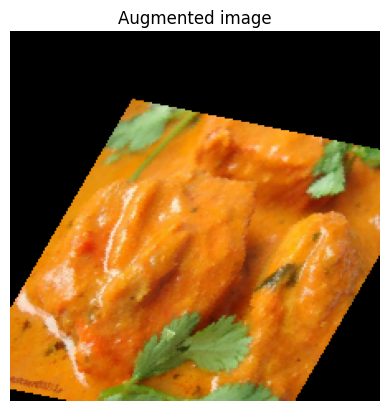

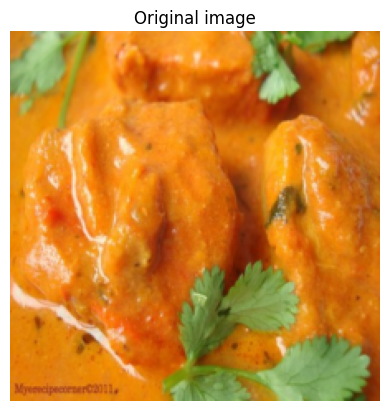

In [ ]:
# Get a batch of data
# When you use next(iter(train_dataloader)), it retrieves the next batch of data from the DataLoader iterator, not specifically the last batch. It fetches batches one by one from the beginning of the DataLoader each time it is invoked until there are no more batches left.
# Get sample data batches (last batch)
images, labels = next(iter(train_dataLoader_unsuffled))


print(f"Image batch shape: {images.shape}")
print(f"Label batch shape: {labels.shape}")


unaugmented_images, unagmented_labels = next(iter(train_dataloader_without_augmented))

# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch size are 32... so random from 0 to 32
print(f"showing image number:{random_number}")
plt.title(f"Augmented image")
plt.imshow(images[random_number].permute(1, 2, 0) ) # we need to do permute for making 224 x 224 x 3
plt.axis(False)
plt.figure()
plt.title(f"Original image")
plt.imshow(unaugmented_images[random_number].permute(1, 2, 0) )
plt.axis(False);

### Build

In [ ]:
torch.manual_seed(42)

class Model_2(nn.Module):

  def __init__(self, input_channels=3, input_size=(64, 64), output_size=10):
      """
      Args:
          input_channels (int): Number of channels in the input image. here 3 for RGB
          input_size (tuple): The (height, width) of the input image.
      """
      super(Model_2, self).__init__()

      # Convolutional layers
      self.conv_layer = nn.Sequential(
          # fiters is the number of sliding window going across the input image
          # Add Padding to Convolutions: This helps retain spatial information
          # Increase Pooling Stride: Using stride=1 in MaxPool2d barely reduces dimensions. Change it to stride=2 to properly downsample.
          nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1), # valid padding = no padding or 0, out_channel
          nn.ReLU(),
          nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2),  #downsample by taking the max from 2x2 regions
          nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2) #downsample by taking the max from 2x2 regions
      )
        # Automatically check the shape of the flatten
        # Brute way:
      # self.flattened_size = input_size[0] * input_size[1] * 32
        # Better way:
      with torch.no_grad():
            # setting batch = 1 . Single batch each loop
            dummy_input = torch.zeros(1, input_channels, *input_size)  # shape: (batch, channels, height, width)
            # dummy_input = torch.zeros(1, 3, 224, 224)  # same as above
            conv_out = self.conv_layer(dummy_input)
            self.flattened_size = nn.Flatten()(conv_out).shape[1]

      #full connected layer
      self.fc = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=self.flattened_size, out_features=output_size),
          # nn.Softmax()  # doesnot need softmax, happen internally.
      )
  def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc(x)
        return x

model_2 = Model_2(
    input_channels=3,
    input_size=(224, 224),
    output_size=10
)
model_2 = model_2.to(device)
model_2

Model_2(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=10, bias=True)
  )
)

In [ ]:
initial_lr = 1e-3
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model_2.parameters(),
                      lr=0.001,              # equivalent to learning_rate=0.001
                      betas=(0.9, 0.999),    # equivalent to beta_1=0.9 and beta_2=0.999
                      eps=1e-07,             # equivalent to epsilon=1e-07
                      amsgrad=False,         # equivalent to amsgrad=False
                      weight_decay=0.0       # if you don't need weight decay, set to 0.0; otherwise, use your desired value)
)
# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)
lr_lambda = lambda epoch: 1 if epoch< 40 else 0.95  **  epoch
# lr = 1e-3 * 10**(epoch/10)
# In PyTorch, since optimizer's lr is already initial_lr, we set:
# lr_factor(epoch) = 10**(epoch/10)
scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

In [ ]:
images[:5].shape

torch.Size([5, 3, 224, 224])

In [ ]:
images, labels = next(iter(valid_dataloader))

# Make predictions
model_2.eval()
with torch.inference_mode():
    images = images.to(device)
    y_logits = model_2(images)[:5]

print(y_logits)
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(torch.sum(y_pred_probs[3,:]))

_, x = torch.max(y_logits, 1)
print("hi:",x)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:5]}\nLabels: {labels[:5]}")

tensor([[ 0.0188,  0.0038, -0.0012, -0.0103,  0.0218,  0.0032, -0.0148, -0.0201,
         -0.0054, -0.0122],
        [ 0.0189,  0.0067, -0.0053, -0.0074,  0.0224,  0.0034, -0.0140, -0.0218,
         -0.0041, -0.0114],
        [ 0.0202,  0.0065, -0.0090, -0.0148,  0.0222,  0.0034, -0.0144, -0.0209,
         -0.0054, -0.0135],
        [ 0.0176,  0.0073, -0.0039, -0.0118,  0.0270,  0.0041, -0.0152, -0.0197,
         -0.0057, -0.0138],
        [ 0.0211,  0.0036, -0.0074, -0.0119,  0.0222,  0.0058, -0.0118, -0.0247,
         -0.0028, -0.0091]], device='cuda:0')
tensor(1., device='cuda:0')
hi: tensor([4, 4, 4, 4, 4], device='cuda:0')
Predictions: tensor([4, 4, 4, 4, 4], device='cuda:0')
Labels: tensor([0, 0, 0, 0, 0])


In [ ]:
labels.size(0)

64

Epoch 1/10 | LR: 0.001000 | Train Loss: 231.1864, Train Acc: 10.9600 | Val Loss: 228.1108, Val Acc: 14.1600
Epoch 2/10 | LR: 0.001000 | Train Loss: 228.2094, Train Acc: 13.7467 | Val Loss: 224.4334, Val Acc: 14.9600
Epoch 3/10 | LR: 0.001000 | Train Loss: 225.3090, Train Acc: 15.1867 | Val Loss: 221.5312, Val Acc: 16.5600
Epoch 4/10 | LR: 0.001000 | Train Loss: 220.1537, Train Acc: 17.5600 | Val Loss: 216.0209, Val Acc: 19.9200
Epoch 5/10 | LR: 0.001000 | Train Loss: 214.3386, Train Acc: 22.7733 | Val Loss: 202.7394, Val Acc: 26.9600
Epoch 6/10 | LR: 0.001000 | Train Loss: 207.6167, Train Acc: 25.4933 | Val Loss: 195.2018, Val Acc: 29.8800
Epoch 7/10 | LR: 0.001000 | Train Loss: 202.8636, Train Acc: 27.6133 | Val Loss: 189.5722, Val Acc: 33.4000
Epoch 8/10 | LR: 0.001000 | Train Loss: 199.9003, Train Acc: 29.6400 | Val Loss: 189.5851, Val Acc: 33.4400
Epoch 9/10 | LR: 0.001000 | Train Loss: 196.5559, Train Acc: 30.5733 | Val Loss: 183.5040, Val Acc: 35.0400
Epoch 10/10 | LR: 0.001000 |

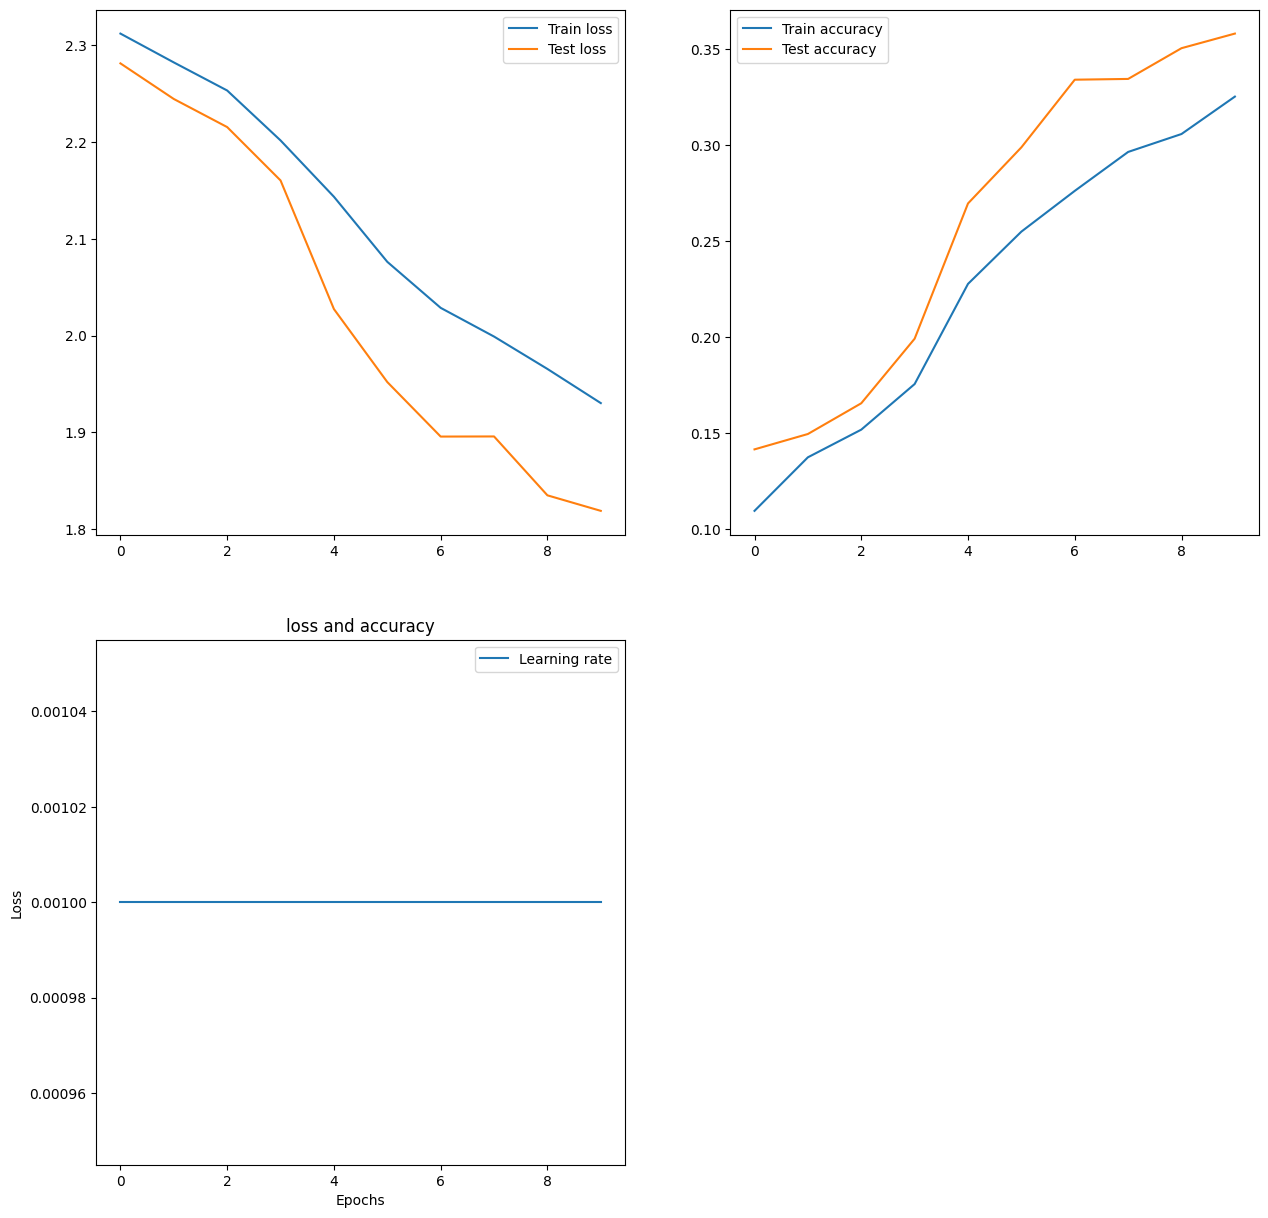

In [ ]:
# fit or train loop
torch.manual_seed(42)
epochs = 10

train_loss_values = []
train_acc_values = []
test_loss_values = []
test_acc_values = []
epoch_count = []
learning_rate = []

for epoch in range(epochs):
    model_2.train()

    running_loss = 0.0
    running_correct = 0
    total = 0
    #
    # y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # loss = loss_fn(y_logits, y_train) # we use y_logits here because CrossEntropyloss uses softmax internally. os we need raw model output
    # acc = accuracy_fn(y_true=y_train,
    #                   y_pred=y_pred_probs)

    for inputs, labels in train_dataloader:
      # Move inputs and labels to the device
      inputs, labels = inputs.to(device), labels.to(device)
      optimizer.zero_grad()
      y_logits = model_2(inputs)
      loss = loss_fn(y_logits, labels) # no need for softmax crosentropy does it internally.
      loss.backward()
      optimizer.step()
      # Statistics
      running_loss += loss.item() * inputs.size(0)
      _, preds = torch.max(y_logits, 1) #ignore the value. just focus on indices i.e preds
      running_correct += (preds == labels).sum().item()
      total += labels.size(0)

    train_loss = running_loss / total
    train_acc = running_correct / total

    ### Testing
      # Validation phase
    model_2.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in valid_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_2(inputs)
            loss = loss_fn(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss = val_running_loss/ val_total
    val_acc = val_correct / val_total

    # Print out what's happening
    current_lr = scheduler.get_last_lr()[0]
    learning_rate.append(current_lr)

    if epoch % 1 == 0 or epoch + 1 == epochs:
        epoch_count.append(epoch)
        train_loss_values.append(train_loss)
        test_loss_values.append(val_loss)
        train_acc_values.append(train_acc)
        test_acc_values.append(val_acc)
        print(f"Epoch {epoch+1}/{epochs} | "
        f"LR: {current_lr:.6f} | "
        f"Train Loss: {(100*train_loss):.4f}, Train Acc: {(100*train_acc):.4f} | "
        f"Val Loss: {(100*val_loss):.4f}, Val Acc: {(100*val_acc):.4f}")
    # Step the scheduler at the end of the epoch
    scheduler.step()



# Plot
plt.figure(figsize=(15, 15))
ax_1 = plt.subplot(2, 2, 1)
ax_2 = plt.subplot(2, 2, 2)
ax_3 = plt.subplot(2, 2, 3)
ax_1.plot(epoch_count,
         train_loss_values,
         label="Train loss")
ax_1.plot(epoch_count,
         test_loss_values,
         label="Test loss")
ax_2.plot(epoch_count,
         train_acc_values,
         label="Train accuracy")
ax_2.plot(epoch_count,
         test_acc_values,
         label="Test accuracy")
ax_3.plot(epoch_count,
         learning_rate,
         label="Learning rate")
ax_1.legend()
ax_2.legend()
ax_3.legend()

ax_1.set_xlabel("Epochs")
ax_2.set_xlabel("Epochs")
ax_3.set_xlabel("Epochs")

ax_1.set_ylabel("Loss")
ax_2.set_ylabel("Accuracy")
ax_3.set_ylabel("Learning rate")

ax_1.set_title("Loss")
ax_2.set_title("Accuracy")
ax_3.set_title("Learning rate")
plt.legend();

### Confusion matrix

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix

  n_classes = cm.shape[0]

  # Let's prettify it


  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


# Set labels to the classes
  if classes is not None:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])  # setting labels 0 t0 1, as shape[0] is 2

  # Labels the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Rotate x-axis labels
  plt.xticks(rotation=45)

  # Adjust the labels size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for direction colors
  threshold = (cm.max() + cm.min()) /2.  # give different shades of color respective to how many values are in each box , darker for more value

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size
            )
  plt.tight_layout()

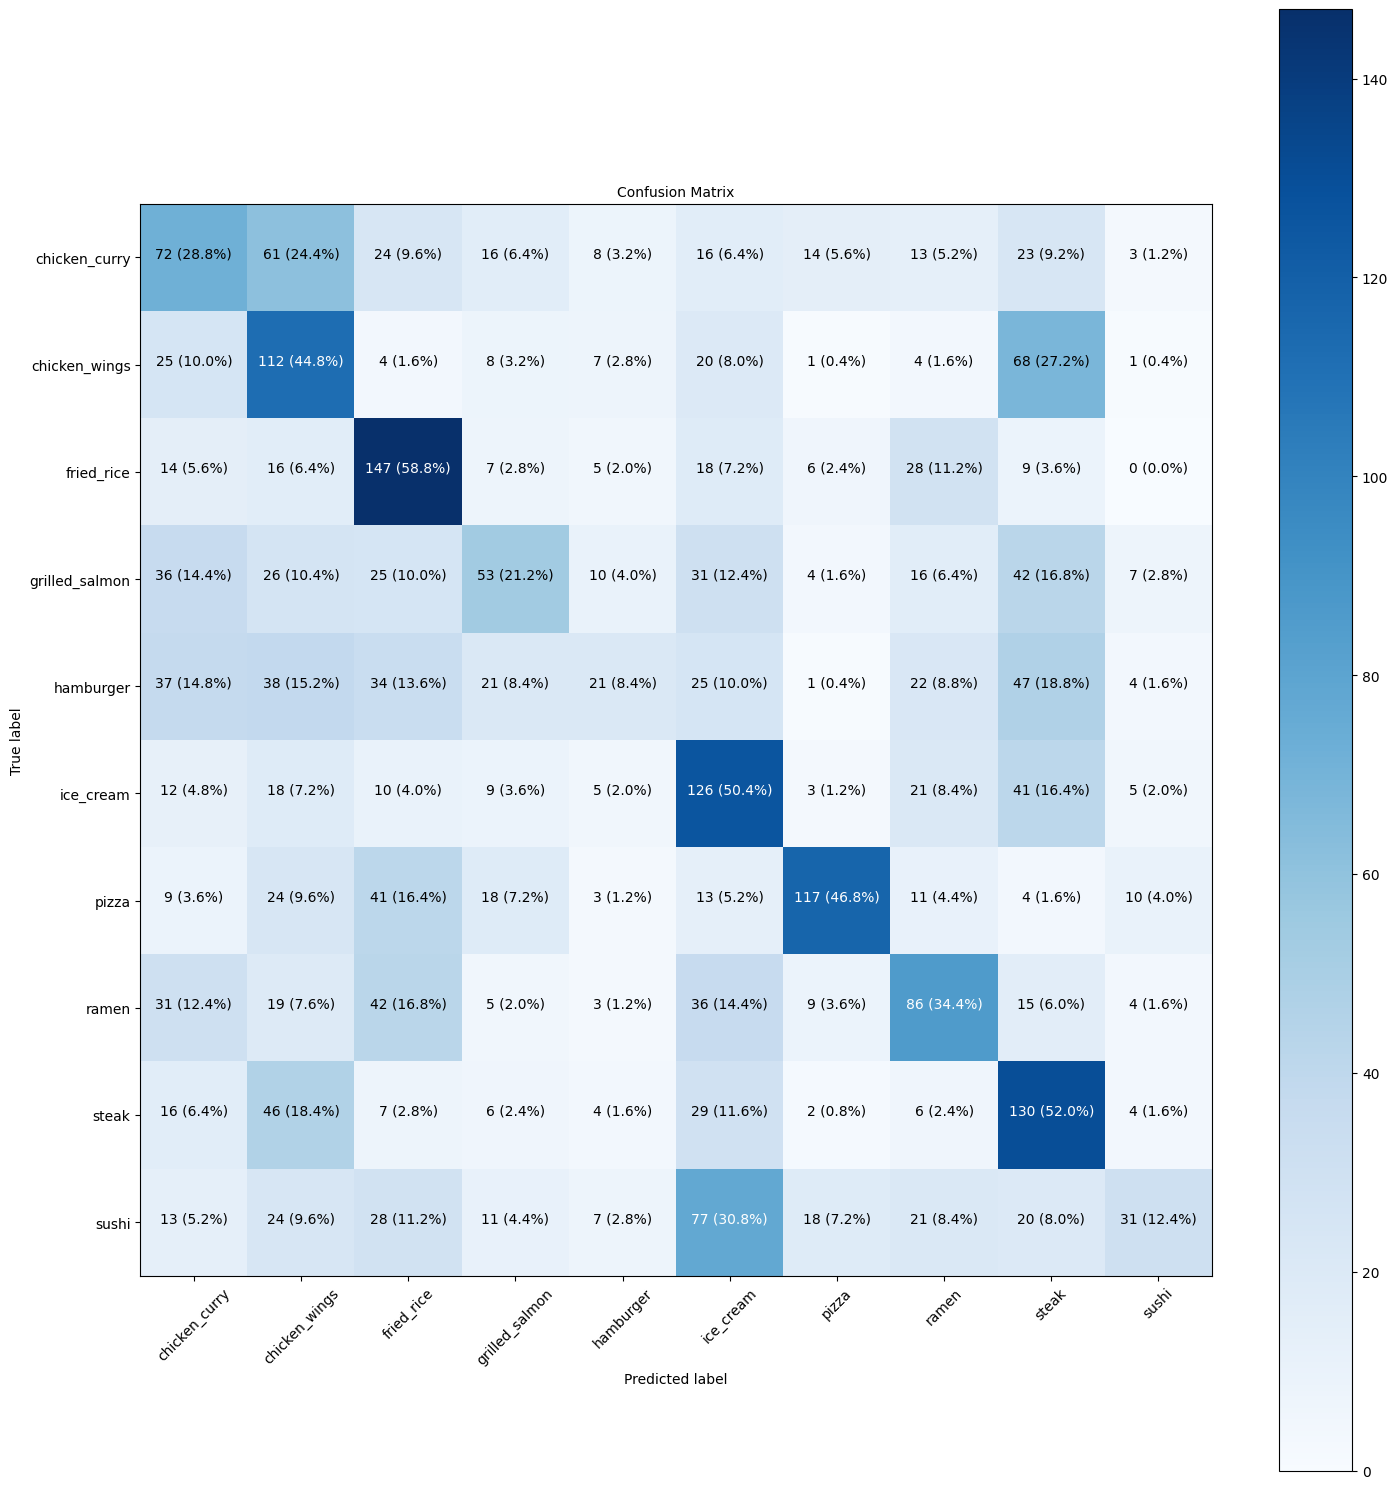

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Validation phase
model_2.eval()
with torch.no_grad():
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_2(inputs)
        _, preds = torch.max(outputs, 1)

        # Append predictions and labels to lists
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create confusion matrix
# cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
make_confusion_matrix(all_labels,all_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10
                      )

## Model_3

- Normalizing data -3 to 3 instead of 0 to 1 and see it
- Centered around 0, faster convergence in -3 to 3 . used in imagenet, resnet...

In [ ]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image
from torch.optim.lr_scheduler import LambdaLR

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
device

PyTorch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124


'cuda'

## Get Data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref= zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2025-02-10 23:33:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   251MB/s    in 2.0s    

2025-02-10 23:33:46 (251 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 2 directories and 0 images in '10_food_classes_all_data'. 
There are 10 directories and 0 images in '10_food_classes_all_data/test'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# to select image randomly image
def view_random_image(target_dir, target_class): #target_dir in directory, target_class is either steak or pizza here
  # Setup the target directory (we'll view iamges from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder  + "/" + random_image[0]) # we random_image in list format so, we change into string path format to read
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}") # show the shape of the image

  return img

['1260731.jpg']
Image shape:(512, 512, 3)


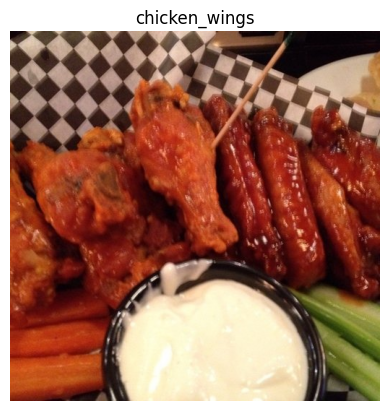

In [ ]:
# Visualize, Visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### Data Batch creation. Normalizing data

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


torch.manual_seed(42)
BATCH_SIZE = 64

# standard values for imagenet
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define transformations for the validation sets
transform_without_augmentation = transforms.Compose([
    transforms.Resize((224, 224)), # resize every image to 64
    transforms.ToTensor(),
    transforms.Normalize(mean, std)  # Normalize with ImageNet stats
])

# Define the transformation for the transform_
transform_with_augmentation =  transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomAffine(
        degrees=20,              # randomly rotate images by -20 to 20 degrees
        translate=(0.2, 0.3),    # randomly shift images: 20% horizontally, 30% vertically
        scale=(0.8, 1.2),        # randomly zoom images: scale ranges from 80% to 120%
        shear=20               # randomly shear images by -20 to 20 degrees
    ),
    transforms.RandomHorizontalFlip(),
    ## above and below are same
    # transforms.RandomRotation(degrees=20),  # Rotates randomly within ±20 degrees
    # transforms.RandomAffine(degrees=0, shear=20),  # Shear transformation
    # transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.2)),  # Zoom effect
    # transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    # transforms.RandomAffine(degrees=0, translate=(0.2, 0.3)),  # Width and height shift
    # transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Random perspective transformation
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean, std)  # Normalize with ImageNet stats
])

# Load the datasets with the transformations
train_data = datasets.ImageFolder(root=train_dir, transform=transform_with_augmentation)
valid_data = datasets.ImageFolder(root=test_dir, transform=transform_without_augmentation)

# for the demonstration only in plot. We always augmented
train_data_without_augmented = datasets.ImageFolder(root=train_dir, transform=transform_without_augmentation)

print(f"The total train_data is :{len(train_data)}")
print(f"The total test_data is :{len(valid_data)}")

# Create DataLoaders
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False)

# for demonsatration only in plot
train_dataloader_without_augmented = DataLoader(train_data_without_augmented, batch_size=BATCH_SIZE, shuffle=False)
train_dataLoader_unsuffled = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, valid_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(valid_dataloader)} batches of {BATCH_SIZE}")
print(f"The classes are: {train_data.classes}")

The total train_data is :7500
The total test_data is :2500
Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7905f5c5db90>, <torch.utils.data.dataloader.DataLoader object at 0x7905e736ced0>)
Length of train dataloader: 118 batches of 64
Length of test dataloader: 40 batches of 64
The classes are: ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [ ]:
images, labels = next(iter(valid_dataloader))

In [ ]:
torch.max(images), torch.min(images)

(tensor(2.6400), tensor(-2.1179))

### Buil, compile, fit

In [ ]:
torch.manual_seed(42)

class Model_3(nn.Module):

  def __init__(self, input_channels=3, input_size=(64, 64), output_size=10):
      """
      Args:
          input_channels (int): Number of channels in the input image. here 3 for RGB
          input_size (tuple): The (height, width) of the input image.
      """
      super(Model_3, self).__init__()

      # Convolutional layers
      self.conv_layer = nn.Sequential(
          # fiters is the number of sliding window going across the input image
          # Add Padding to Convolutions: This helps retain spatial information
          # Increase Pooling Stride: Using stride=1 in MaxPool2d barely reduces dimensions. Change it to stride=2 to properly downsample.
          nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1), # valid padding = no padding or 0, out_channel
          nn.ReLU(),
          nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2),  #downsample by taking the max from 2x2 regions
          nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2) #downsample by taking the max from 2x2 regions
      )
        # Automatically check the shape of the flatten
        # Brute way:
      # self.flattened_size = input_size[0] * input_size[1] * 32
        # Better way:
      with torch.no_grad():
            # setting batch = 1 . Single batch each loop
            dummy_input = torch.zeros(1, input_channels, *input_size)  # shape: (batch, channels, height, width)
            # dummy_input = torch.zeros(1, 3, 224, 224)  # same as above
            conv_out = self.conv_layer(dummy_input)
            self.flattened_size = nn.Flatten()(conv_out).shape[1]

      #full connected layer
      self.fc = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=self.flattened_size, out_features=output_size),
          # nn.Softmax()  # doesnot need softmax, happen internally.
      )
  def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc(x)
        return x

model_3 = Model_3(
    input_channels=3,
    input_size=(224, 224),
    output_size=10
)
model_3 = model_3.to(device)
model_3

Model_3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=10, bias=True)
  )
)

In [ ]:
initial_lr = 1e-3
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model_3.parameters(),
                      lr=0.001,              # equivalent to learning_rate=0.001
                      betas=(0.9, 0.999),    # equivalent to beta_1=0.9 and beta_2=0.999
                      eps=1e-07,             # equivalent to epsilon=1e-07
                      amsgrad=False,         # equivalent to amsgrad=False
                      weight_decay=0.0       # if you don't need weight decay, set to 0.0; otherwise, use your desired value)
)
# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)
lr_lambda = lambda epoch: 1 if epoch< 40 else 0.95  **  epoch
# lr = 1e-3 * 10**(epoch/10)
# In PyTorch, since optimizer's lr is already initial_lr, we set:
# lr_factor(epoch) = 10**(epoch/10)
scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

In [ ]:
images, labels = next(iter(valid_dataloader))

# Make predictions
model_3.eval()
with torch.inference_mode():
    images = images.to(device)
    y_logits = model_3(images)[:5]

print(y_logits)
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(torch.sum(y_pred_probs[3,:]))

_, x = torch.max(y_logits, 1)
print(x)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:5]}\nLabels: {labels[:5]}")

tensor([[ 0.0489, -0.0298,  0.0013, -0.0140,  0.0395,  0.0095, -0.0421, -0.0164,
         -0.0154, -0.0335],
        [ 0.0450, -0.0144, -0.0370, -0.0218,  0.0557,  0.0157, -0.0275, -0.0343,
         -0.0169, -0.0358],
        [ 0.0505, -0.0380, -0.0416, -0.0423,  0.0520,  0.0274, -0.0204, -0.0529,
         -0.0511, -0.0391],
        [ 0.0475, -0.0275, -0.0205, -0.0404,  0.0630,  0.0144, -0.0279, -0.0178,
         -0.0279, -0.0292],
        [ 0.0416, -0.0338, -0.0312, -0.0330,  0.0217,  0.0490, -0.0216, -0.0603,
         -0.0015,  0.0006]], device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor([0, 4, 4, 4, 5], device='cuda:0')
Predictions: tensor([0, 4, 4, 4, 5], device='cuda:0')
Labels: tensor([0, 0, 0, 0, 0])


Epoch 1/10 | LR: 0.001000 | Train Loss: 230.8757, Train Acc: 12.6133 | Val Loss: 224.4473, Val Acc: 14.8800
Epoch 2/10 | LR: 0.001000 | Train Loss: 223.2797, Train Acc: 15.8400 | Val Loss: 221.5351, Val Acc: 18.0400
Epoch 3/10 | LR: 0.001000 | Train Loss: 214.8970, Train Acc: 21.4133 | Val Loss: 206.6193, Val Acc: 24.4400
Epoch 4/10 | LR: 0.001000 | Train Loss: 209.1562, Train Acc: 23.8933 | Val Loss: 198.4142, Val Acc: 28.3200
Epoch 5/10 | LR: 0.001000 | Train Loss: 204.1771, Train Acc: 26.2400 | Val Loss: 193.5400, Val Acc: 31.0000
Epoch 6/10 | LR: 0.001000 | Train Loss: 199.7554, Train Acc: 29.6133 | Val Loss: 186.1568, Val Acc: 34.1200
Epoch 7/10 | LR: 0.001000 | Train Loss: 196.1985, Train Acc: 30.0933 | Val Loss: 184.1836, Val Acc: 34.4000
Epoch 8/10 | LR: 0.001000 | Train Loss: 192.3609, Train Acc: 32.7200 | Val Loss: 185.3459, Val Acc: 33.8000
Epoch 9/10 | LR: 0.001000 | Train Loss: 190.1563, Train Acc: 33.5600 | Val Loss: 178.4871, Val Acc: 36.6000
Epoch 10/10 | LR: 0.001000 |

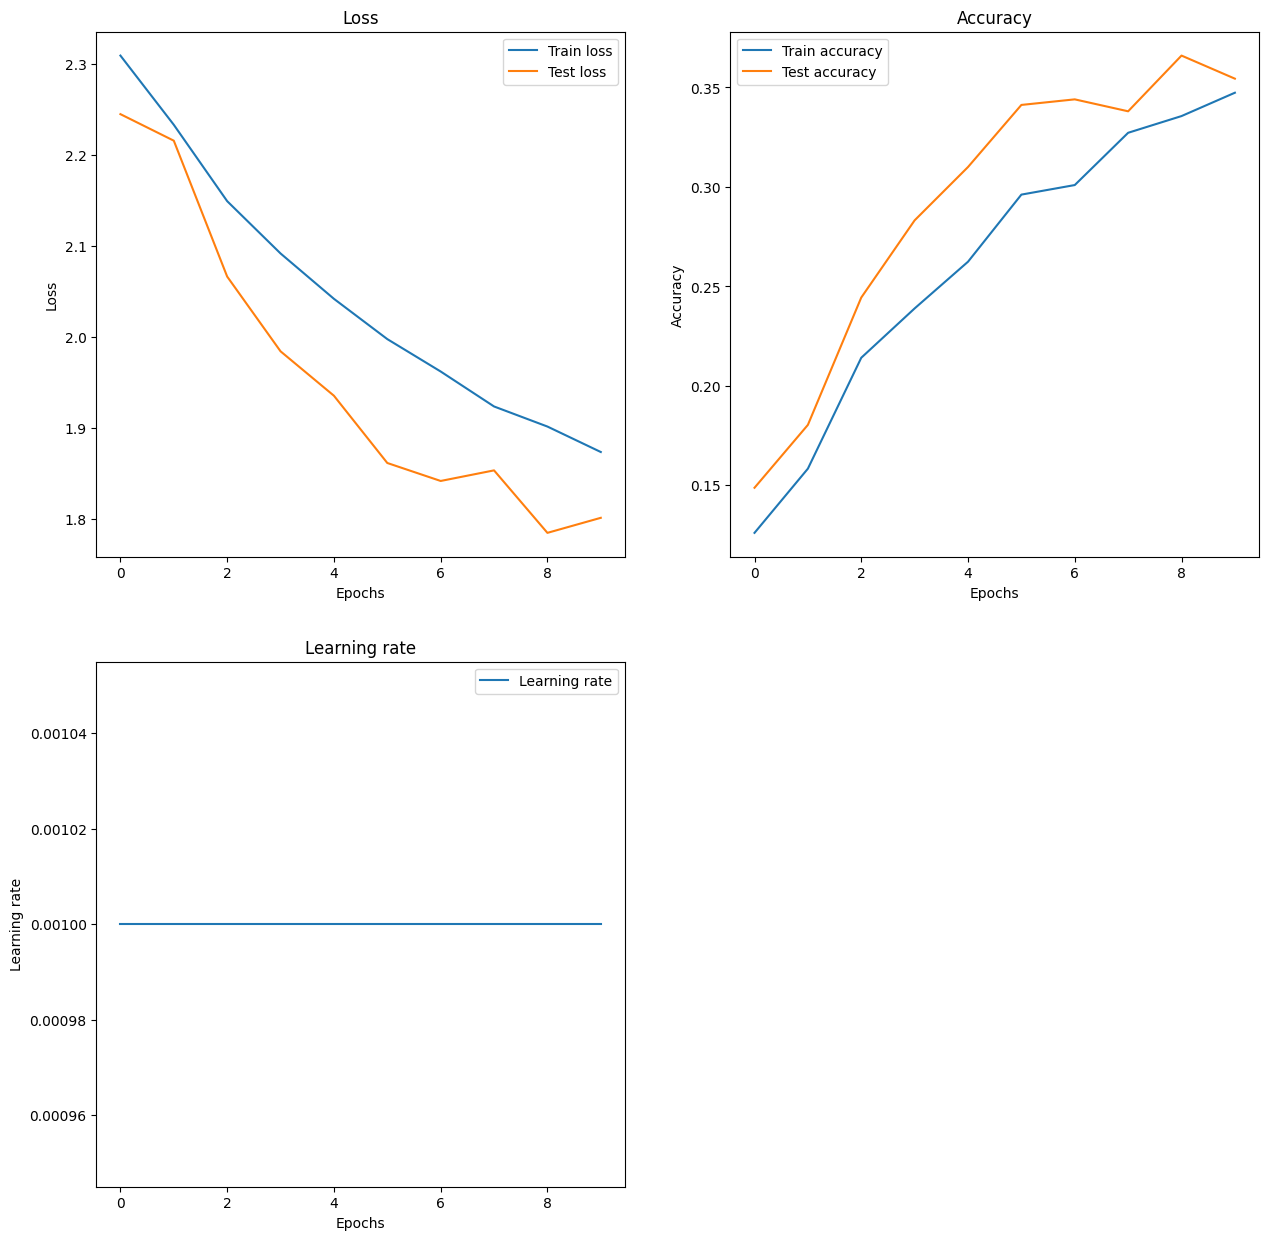

In [ ]:
# fit or train loop
torch.manual_seed(42)
epochs = 10

train_loss_values = []
train_acc_values = []
test_loss_values = []
test_acc_values = []
epoch_count = []
learning_rate = []

for epoch in range(epochs):
    model_3.train()

    running_loss = 0.0
    running_correct = 0
    total = 0
    #
    # y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # loss = loss_fn(y_logits, y_train) # we use y_logits here because CrossEntropyloss uses softmax internally. os we need raw model output
    # acc = accuracy_fn(y_true=y_train,
    #                   y_pred=y_pred_probs)

    for inputs, labels in train_dataloader:
      # Move inputs and labels to the device
      inputs, labels = inputs.to(device), labels.to(device)
      optimizer.zero_grad()
      y_logits = model_3(inputs)
      loss = loss_fn(y_logits, labels) # no need for softmax crosentropy does it internally.
      loss.backward()
      optimizer.step()
      # Statistics
      running_loss += loss.item() * inputs.size(0)
      _, preds = torch.max(y_logits, 1) #ignore the value. just focus on indices i.e preds
      running_correct += (preds == labels).sum().item()
      total += labels.size(0)

    train_loss = running_loss / total
    train_acc = running_correct / total

    ### Testing
      # Validation phase
    model_3.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in valid_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_3(inputs)
            loss = loss_fn(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss = val_running_loss/ val_total
    val_acc = val_correct / val_total

    # Print out what's happening
    current_lr = scheduler.get_last_lr()[0]
    learning_rate.append(current_lr)

    if epoch % 1 == 0 or epoch + 1 == epochs:
        epoch_count.append(epoch)
        train_loss_values.append(train_loss)
        test_loss_values.append(val_loss)
        train_acc_values.append(train_acc)
        test_acc_values.append(val_acc)
        print(f"Epoch {epoch+1}/{epochs} | "
        f"LR: {current_lr:.6f} | "
        f"Train Loss: {(100*train_loss):.4f}, Train Acc: {(100*train_acc):.4f} | "
        f"Val Loss: {(100*val_loss):.4f}, Val Acc: {(100*val_acc):.4f}")
    # Step the scheduler at the end of the epoch
    scheduler.step()



# Plot
plt.figure(figsize=(15, 15))
ax_1 = plt.subplot(2, 2, 1)
ax_2 = plt.subplot(2, 2, 2)
ax_3 = plt.subplot(2, 2, 3)
ax_1.plot(epoch_count,
         train_loss_values,
         label="Train loss")
ax_1.plot(epoch_count,
         test_loss_values,
         label="Test loss")
ax_2.plot(epoch_count,
         train_acc_values,
         label="Train accuracy")
ax_2.plot(epoch_count,
         test_acc_values,
         label="Test accuracy")
ax_3.plot(epoch_count,
         learning_rate,
         label="Learning rate")
ax_1.legend()
ax_2.legend()
ax_3.legend()

ax_1.set_xlabel("Epochs")
ax_2.set_xlabel("Epochs")
ax_3.set_xlabel("Epochs")

ax_1.set_ylabel("Loss")
ax_2.set_ylabel("Accuracy")
ax_3.set_ylabel("Learning rate")

ax_1.set_title("Loss")
ax_2.set_title("Accuracy")
ax_3.set_title("Learning rate")
plt.legend();

### Confusion matrix

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix

  n_classes = cm.shape[0]

  # Let's prettify it


  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


# Set labels to the classes
  if classes is not None:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])  # setting labels 0 t0 1, as shape[0] is 2

  # Labels the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Rotate x-axis labels
  plt.xticks(rotation=45)

  # Adjust the labels size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for direction colors
  threshold = (cm.max() + cm.min()) /2.  # give different shades of color respective to how many values are in each box , darker for more value

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size
            )
  plt.tight_layout()

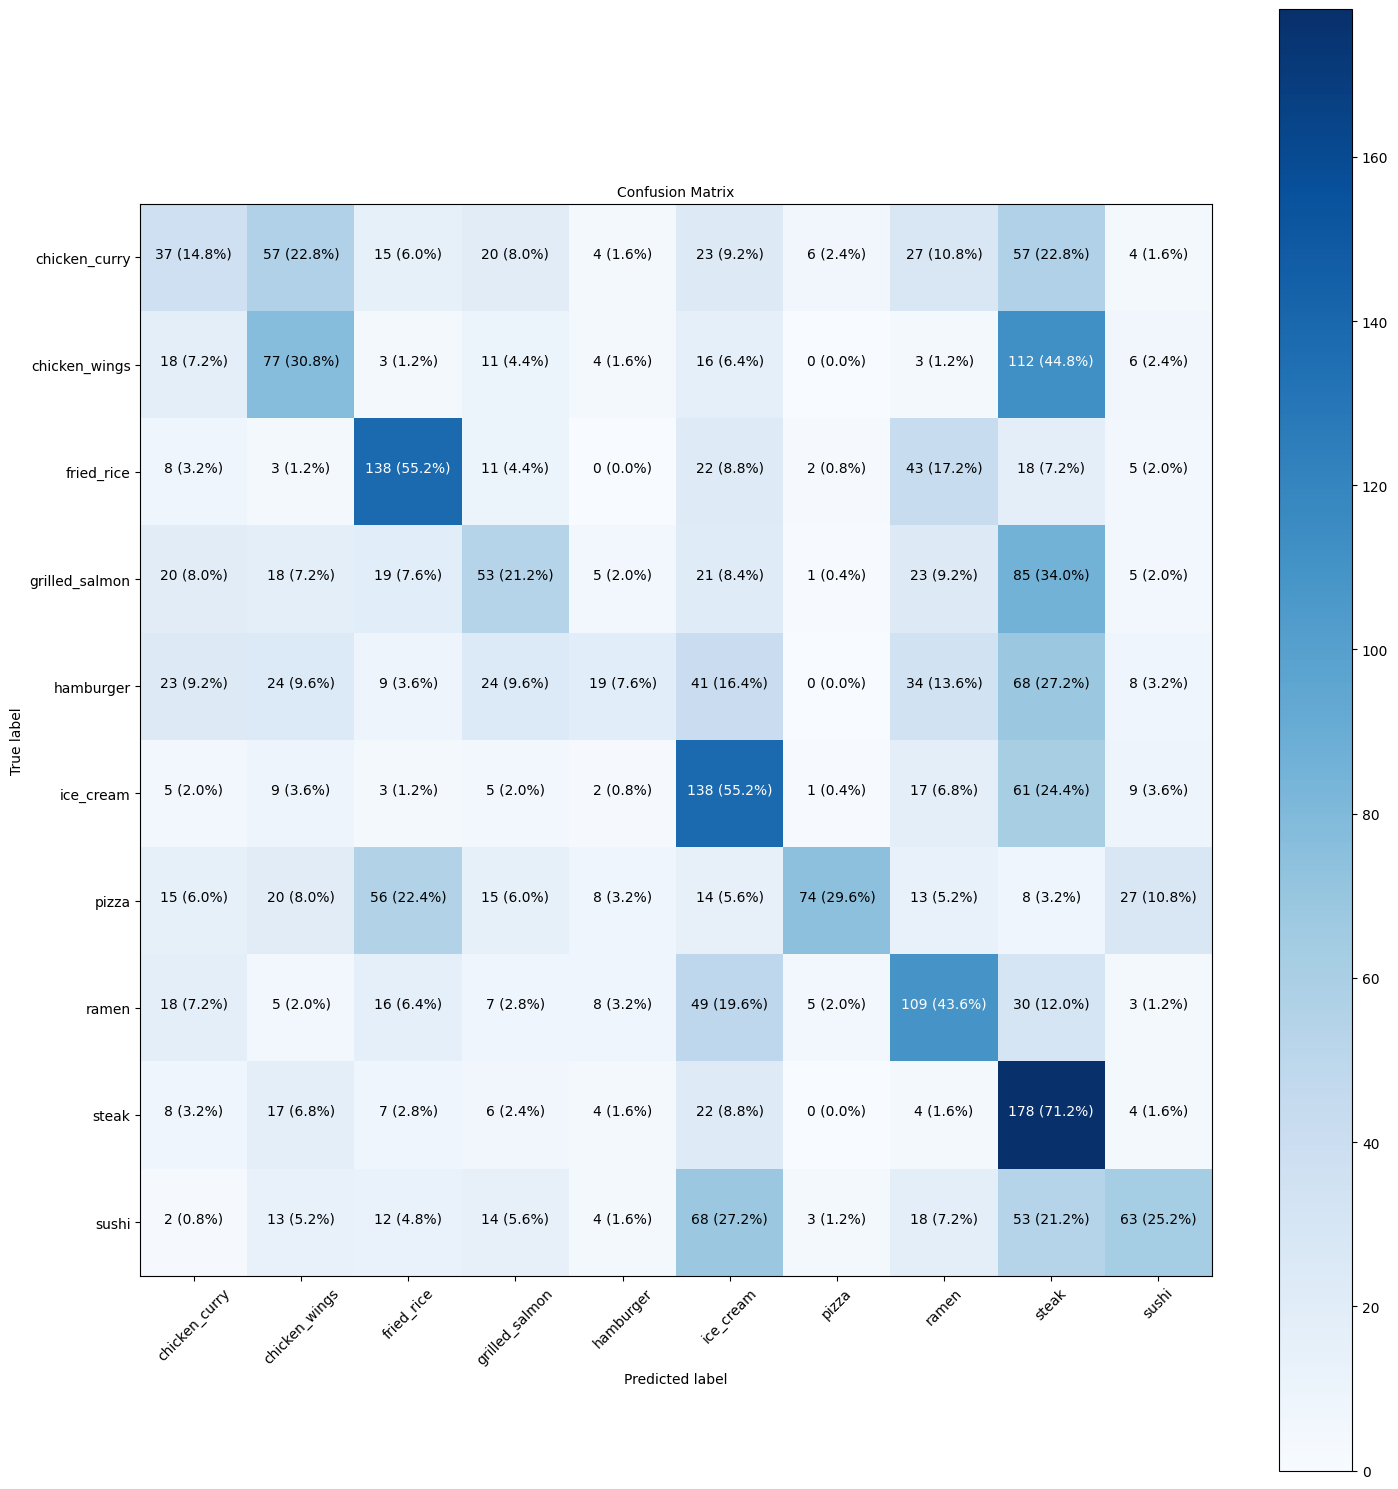

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Validation phase
model_3.eval()
with torch.no_grad():
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_3(inputs)
        _, preds = torch.max(outputs, 1)

        # Append predictions and labels to lists
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create confusion matrix
# cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
make_confusion_matrix(all_labels,all_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10
                      )

### Prediction

In [ ]:
# Get sample data batches (last batch)
images, labels = next(iter(valid_dataloader))
# Make predictions
model_3.eval()
with torch.inference_mode():
    images = images.to(device)
    y_logits = model_3(images)[:5]

# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:5]}\nLabels: {labels[:5]}")

Predictions: tensor([8, 8, 8, 5, 3], device='cuda:0')
Labels: tensor([0, 0, 0, 0, 0])


In [ ]:
images.shape

torch.Size([32, 3, 224, 224])

In [ ]:
# standard values for imagenet
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform_without_augmentation = transforms.Compose([
    transforms.Resize((224, 224)), # resize every image to 64
    transforms.ToTensor(),
    transforms.Normalize(mean, std)  # Normalize with ImageNet stats
])

# Create a function to import an image and resize it to be able to used with our
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, converts it to a tensor, and resizes it to (img_shape, img_shape).
    """
    # Open the image file
    img = Image.open(filename)  # Convert to grayscale for MNIST-like input

    img = transform_without_augmentation(img)


    # Add batch dimension
    img = img.unsqueeze(0)

    return img

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located at filename, makes a prediciton with model
  and plot the images with the predicted class as teh title.
  """
  # Import the target iamge and preprocess it
  img = load_and_prep_image(filename)

  model.eval()
  with torch.no_grad():
    image = img.to(device)
    y_logits = model(image)
    # Turn predicted logits in prediction probabilities
    y_pred_probs = torch.softmax(y_logits, dim=1)
    # Turn prediction probabilities into prediction labels
    y_pred = y_pred_probs.argmax(dim=1)
    print("y_pred:", y_pred)


  # Plot the image and predict class
  # plt.imshow(img.squeeze().permute(1,2,0))
  # Path to your image
  image_path = filename
  # Load the image using PIL
  image = Image.open(image_path)
  # Display the image
  plt.imshow(image)
  plt.title(f"Prediction: {class_names[int(y_pred.cpu().numpy().item())]}")

  plt.axis(False);

y_pred: tensor([2], device='cuda:0')


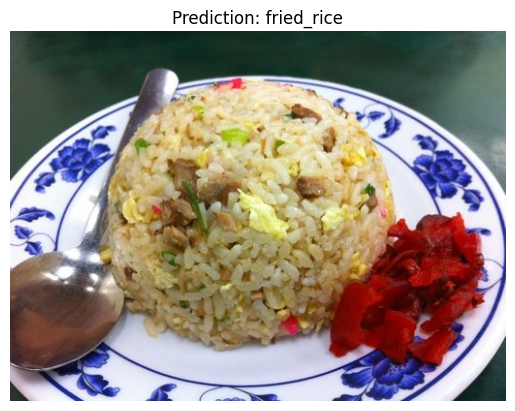

In [ ]:
pred_and_plot(model_3, "/content/10_food_classes_all_data/test/fried_rice/108226.jpg", class_names=class_names)